In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

%matplotlib inline

#Import module to split the datasets
from sklearn.model_selection import train_test_split
# Import modules to evaluate the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
plt.style.use('fivethirtyeight')
print(tf.__version__)

import os

2.16.1


In [20]:
df= pd.read_csv("/home/aya/AI-GuessingGame/data/train_data.csv", sep=";", encoding='cp1252')
len(df), df.head(10)

(652,
                                phrase,hot/cold
 0       A bone-chilling breeze in the air,cold
 1                          The air is icy,cold
 2            A frostbitten morning breeze,cold
 3                  A bone-chilling breeze,cold
 4                      The air is chilled,cold
 5                     An ice-cold morning,cold
 6       The ground is ice-cold and biting,cold
 7          The air is freezing and biting,cold
 8             A deep frost in the morning,cold
 9  The ground is frostbite cold and harsh,cold)

In [21]:
data = []
label = ""
for i,v in df.iterrows():
    e = (v.tolist())[0].split(',')
    label = 1 if e[-1] == 'hot' else 0
        
    data.append([e[0], e[-1], label])

df = pd.DataFrame(data)
# df = df.transpose()
df.columns = ['phrase', 'category', 'label']
df.head(10)

,phrase,category,label
0,A bone-chilling breeze in the air,cold,0
1,The air is icy,cold,0
2,A frostbitten morning breeze,cold,0
3,A bone-chilling breeze,cold,0
4,The air is chilled,cold,0
5,An ice-cold morning,cold,0
6,The ground is ice-cold and biting,cold,0
7,The air is freezing and biting,cold,0
8,A deep frost in the morning,cold,0
9,The ground is frostbite cold and harsh,cold,0


In [28]:
df.category.value_counts()

category
hot     337
cold    315
Name: count, dtype: int64

In [29]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# ! pip install scipy==1.12

# Heuristic Approach

In [30]:
import random
truth = random.randint(1, 100)
truth

36

In [41]:
guess = False
comp = 50
tries = 0
l, h = 1, 100

while guess is False:
    print(comp, l, h)
    if comp == truth:
        tries += 1
        guess = True
    else:
        tries+=1
        if comp < truth:
            indicator = 1
            l = comp
        else:
            indicator = 0
            h = comp
            
        comp = random.randint(l, h)
    
    

50 1 100
28 1 50
42 28 50
38 28 42
34 28 38
37 34 38
34 34 37
37 34 37
35 34 37
36 35 37


In [42]:
tries

10

# Feature Engineering using Glove Vectors

In [50]:
max_features = 20000
max_text_length = 512


In [60]:
x = df.phrase.values
y = df.label.values
x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val= sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [94]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
for word, index in x_tokenizer.word_index.items():
    print(word, index, embeddings_index.get(word))
    break

a 1 [-0.27086    0.044006  -0.02026   -0.17395    0.6444     0.71213
  0.3551     0.47138   -0.29637    0.54427   -0.72294   -0.0047612
  0.040611   0.043236   0.29729    0.10725    0.40156   -0.53662
  0.033382   0.067396   0.64556   -0.085523   0.14103    0.094539
  0.74947   -0.194     -0.68739   -0.41741   -0.22807    0.12
 -0.48999    0.80945    0.045138  -0.11898    0.20161    0.39276
 -0.20121    0.31354    0.75304    0.25907   -0.11566   -0.029319
  0.93499   -0.36067    0.5242     0.23706    0.52715    0.22869
 -0.51958   -0.79349   -0.20368   -0.50187    0.18748    0.94282
 -0.44834   -3.6792     0.044183  -0.26751    2.1997     0.241
 -0.033425   0.69553   -0.64472   -0.0072277  0.89575    0.20015
  0.46493    0.61933   -0.1066     0.08691   -0.4623     0.18262
 -0.15849    0.020791   0.19373    0.063426  -0.31673   -0.48177
 -1.3848     0.13669    0.96859    0.049965  -0.2738    -0.035686
 -1.0577    -0.24467    0.90366   -0.12442    0.080776  -0.83401
  0.57201    0.088945

In [61]:
embedding_dim =100
embeddings_index = dict()
f = open('/home/aya/AI-GuessingGame/data/glove.6B.100d.txt/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word]= coefs
f.close()
del f
print(f'Found {len(embeddings_index)} word vectors')

Found 400000 word vectors


In [62]:
embedding_matrix= np.zeros((max_features,embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index>max_features-1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index]= embedding_vector

In [93]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## 1D CNN with Glove Features

In [82]:
y_train_plus_val =  tf.keras.utils.to_categorical(y, num_classes=2)
# y_train_plus_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
## CNN Model

model = Sequential()
model.add(Embedding(max_features,
                    embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    trainable=False))

model.add(Dropout(0.2))

model.add(Conv1D(64,2,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(64,2,padding='valid',activation='relu'))
model.add(MaxPooling1D())

model.add(Conv1D(32,2,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32,2,padding='valid',activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
optimizer = tf.keras.optimizers.Adam(0.0001)
optimizer.learning_rate.assign(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['f1_score', 'accuracy'])

In [75]:
cnn = model.fit(x_train_val, y_train_plus_val, batch_size=4, validation_split=0.2, epochs=10)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8732 - f1_score: 0.8475 - loss: 0.3850 - val_accuracy: 0.5649 - val_f1_score: 0.3610 - val_loss: 0.8112
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8798 - f1_score: 0.8674 - loss: 0.3698 - val_accuracy: 0.7023 - val_f1_score: 0.4126 - val_loss: 0.5490
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8241 - f1_score: 0.7815 - loss: 0.5002 - val_accuracy: 0.4351 - val_f1_score: 0.3032 - val_loss: 0.7460
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7770 - f1_score: 0.7315 - loss: 0.5350 - val_accuracy: 0.3969 - val_f1_score: 0.2842 - val_loss: 0.9344
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7513 - f1_score: 0.6818 - loss: 0.5206 - val_accuracy: 0.3969 - val_f1_score: 0.2842 - val_loss: 0.8025
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7642 - f1_score: 0.7189 - loss: 0.4958 - val_accuracy: 0.4046 - val_f1_score: 0.2880

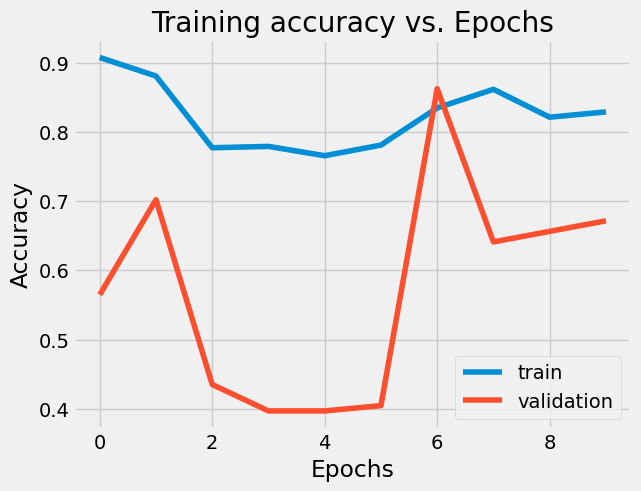

In [77]:
# Plot accuracy
plt.plot(cnn.history['accuracy'], label='train')
plt.plot(cnn.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Epochs')
plt.legend()
plt.show()

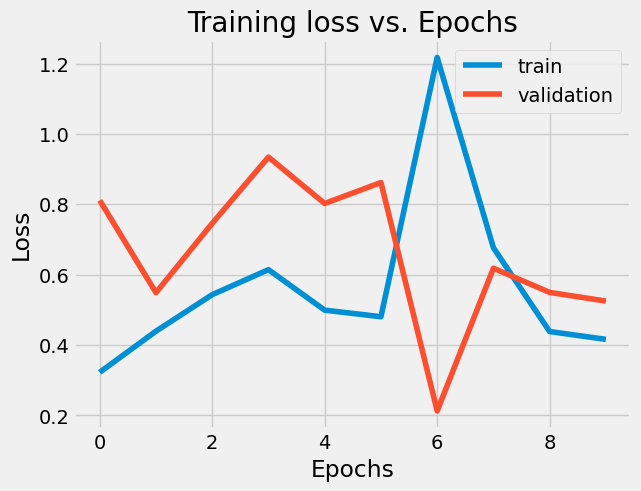

In [78]:
# Plot loss
plt.plot(cnn.history['loss'], label='train')
plt.plot(cnn.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')
plt.legend()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


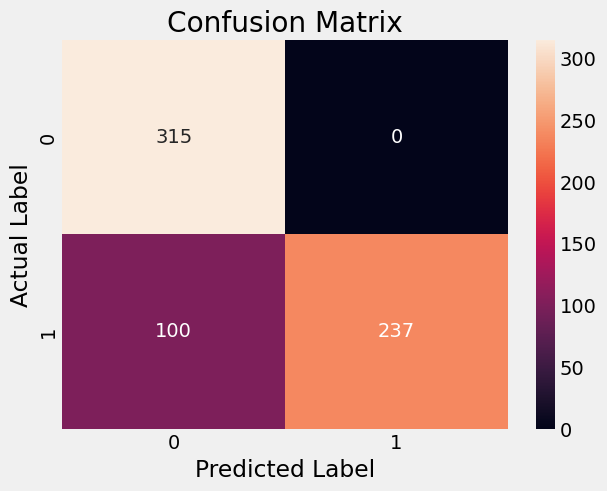

In [85]:
y_pred = model.predict(x_train_val)
y_pred = np.array( [ np.argmax (y) for y in y_pred ] )
cm = confusion_matrix(y, y_pred)
fig = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show(fig)

In [84]:
model.save('1dcnn_glove.h5')
cnn = tf.keras.models.load_model("1dcnn_glove.h5")
